# Exercises for Machine Learning with Python, Lecture 1: *Linear Least Squares Regression*



## Before you begin the exercises:



The datafiles are text files stored here (also try and download them to your own computer, open and see what they contain):

Features: https://www.dropbox.com/s/pf2sfiy9l86xhww/boston_features.txt

Prices: https://www.dropbox.com/s/j7flze0oe86pr6o/boston_prices.txt

*   Start by downloading the dataset:

In [21]:
# Download the features and target (the prices) to Google Colab using !wget
!wget -O boston_features.txt https://www.dropbox.com/s/pf2sfiy9l86xhww/boston_features.txt
!wget -O boston_prices.txt https://www.dropbox.com/s/j7flze0oe86pr6o/boston_prices.txt

--2020-05-13 15:34:07--  https://www.dropbox.com/s/pf2sfiy9l86xhww/boston_features.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pf2sfiy9l86xhww/boston_features.txt [following]
--2020-05-13 15:34:08--  https://www.dropbox.com/s/raw/pf2sfiy9l86xhww/boston_features.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfcce27fc0a2ecd38bd118e07c6.dl.dropboxusercontent.com/cd/0/inline/A3o5VSYBFQREn6bIHoMp8eCHzv-dlsHUxOhSzn0e-mGjJGXBIOBRccuEbsU007U_y6mY9lRWkNQOcGfZ-DeO-7KzLELA6md-IqkcjPs3uhHf7EpGEcnaMMu7NAhKw9gb2qs/file# [following]
--2020-05-13 15:34:08--  https://ucfcce27fc0a2ecd38bd118e07c6.dl.dropboxusercontent.com/cd/0/inline/A3o5VSYBFQREn6bIHoMp8eCHzv-dlsHUxOhSzn0e-mGjJGXBIOBRccuEbsU007U_y6mY9lRWkNQOcGfZ-DeO-7KzLE

This time we will not be using a Pandas DataFrames, because we will code the Linear Least Squares Regression ourselves using Numpy.

*   Now, load the txt files into NumPy arrays:

In [0]:
import numpy as np

features = np.loadtxt("boston_features.txt")
prices = np.loadtxt("boston_prices.txt")

As you can see below, the features is a matrix contatining 506 rows (one for each house), each with 13 entries (one for each feature). Additionally, there are 506 prices (again, one for each house).

In [23]:
print(features.shape)
print(prices.shape)

(506, 13)
(506,)


In [24]:
print(features)
print(prices)

[[1.58760e-01 0.00000e+00 1.08100e+01 ... 1.92000e+01 3.76940e+02
  9.88000e+00]
 [4.54192e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.74560e+02
  7.79000e+00]
 [7.52601e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.04210e+02
  1.93100e+01]
 ...
 [2.68380e-01 0.00000e+00 9.69000e+00 ... 1.92000e+01 3.96900e+02
  1.41000e+01]
 [1.09590e-01 0.00000e+00 1.19300e+01 ... 2.10000e+01 3.93450e+02
  6.48000e+00]
 [1.54450e-01 2.50000e+01 5.13000e+00 ... 1.97000e+01 3.90680e+02
  6.86000e+00]]
[21.7 25.  13.  23.6 21.7 35.2 19.3 14.1 18.9 13.6 19.6 42.8 25.   9.7
 20.7 19.3 37.6 13.1 21.7 16.5 29.4 18.3 15.6 48.3 36.2 21.4 15.2 18.2
 17.8 19.6 25.  18.  32.4 50.  29.8 18.6 23.9 10.5 19.3 11.9  6.3 14.4
 23.8 29.  22.   8.5 24.5 36.  43.5 16.5 20.4 22.5 23.1 37.  20.3  7.4
 11.7 24.5 23.  25.  28.  21.4 20.3 13.8 20.  33.8 13.5 18.8 21.  23.2
 26.4 20.1 14.6 17.1 17.8 27.5 15.  18.9 23.  20.5 19.1 12.  19.2 19.1
 16.2 27.1 12.7 22.  19.3  7.2 21.7 17.4 20.2 35.1 50.  17.8 31.6 16.1
 15.  21.9 

Beside the housing prices, the dataset contains and information about location, etc (see below), and the prices are units of in USD $1000.

```
Index   Description
-----------------------------------------------------------------------
   0    per capita crime rate by town
   1    proportion of residential land zoned for lots over 25,000 sq.ft.
   2    proportion of non-retail business acres per town
   3    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   4    nitric oxides concentration (parts per 10 million)
   5    average number of rooms per dwelling
   6    proportion of owner-occupied units built prior to 1940
   7    weighted distances to five Boston employment centres
   8    index of accessibility to radial highways
   9    full-value property-tax rate per $10,000
  10    pupil-teacher ratio by town
  11    1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
  12    % lower status of the population
```


## Exercise 1.1: Exploratory Data Analysis

Before we begin the regression, lets have a look at the data. As in the lecture, we will plot the correlation between our features using Seaborn.

Since we loaded in the data as a Numpy Array, we have to create a Pandas DataFrame for Seaborn. This can be done with the code below:

In [25]:
#Pandas DataFrames
import pandas as pd

# Make a Pandas dataframe from the features
df = pd.DataFrame(features[:,:5]) 

# NOTE: ONLY TAKES THE FIRST 5 COLUMNS/FEATURES
# features[:,:5] is Numpy slice notation for "take all rows, and first five colums"

# Print the type of the dataframe, just to make sure we coverted correctly
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Note that since there are 13 features, the correlation plot would contain 169 plots. This would be quite slow in Google Colab. For speed reasons, we only loaded the first 5 featues into the pandas dataframe for plotting.



### Question 1.1.1: 

*   Just like in the lecture, make an `sns.pairplot()` using Seaborn of the dataframe we just made.
*   (Optional) If you want, change the style of the plot as shown during the lecture. You can see some customization options in the documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html

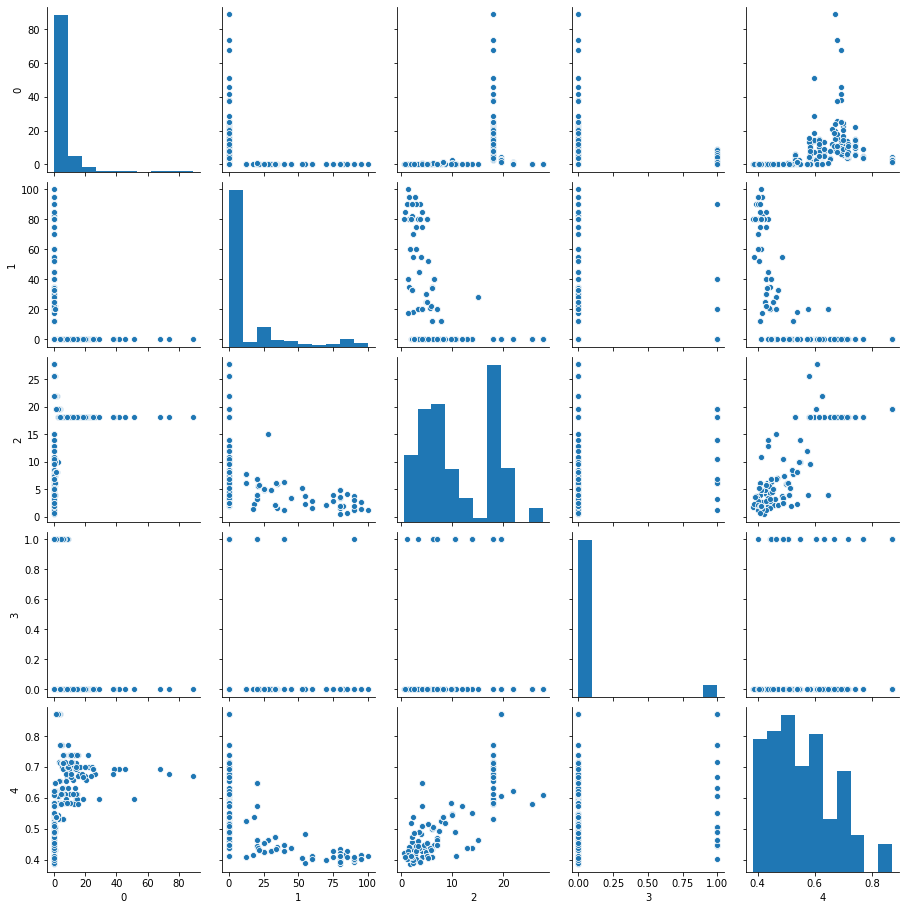

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the pairplot of the Pandas DataFrame
sns.pairplot(df)

### Question 1.1.2:

One thing you might note from the pair-correlation plot is that some of the features look odd. However, these features still work well for linear regression. 

*    Can you explain why the correlations between Feature 3 and everything else look odd?

**Give your answer:** 

## Exercise 1.2: Training and Test sets

In order to train and evaluate our linear regression model, we first have to divide the dataset into two parts: A training set and a test set.


### Question 1.2.1:
A common practice is to have the training set be 70% of the full set and test set 30%.

There are 506 houses in our dataset, so divide your data into 354 in the training set and 152 in the test set.

You can use Numpy's slice notation for this, as introducted in the first lectures. For example, to take the first five *rows* from an array you can use the following notation:
```
data_first_five_rows = data[:5]
```




To complete this Question, do the following task:
*    Divide both of the numpy arrays `features` and `prices` into two parts.
*    Use, for example, the Numpy slice notation to achieve this.
*    Make sure that the same house in never in both the test and training set at the same time! Other than that, you are free to choose which rows to the test set and which go to the training set.

In [0]:
# Make the two sets of features below
features_train = features[:354]
features_test = features[354:]

# Make the two sets of prices below
prices_train = prices[:354]
prices_test = prices[354:]

## Exercise 1.3: Regression Fit

In the linear least squares regression, we solve an equation that looks like this:

$$ \mathbf{y} = \mathbf{X} \mathbf{\alpha}$$

Where $\mathbf{y}$ is a vector containing the target labels (for example housing prices), $\mathbf{X}$ is a matrix where the each row contain features (in our case the features for a given house in Boston) for each house. Finally, $\alpha is a vector containing the (unknown) regression coefficients.

Fortunately, Numpy has built-in capabilites for solving linear least squares regression. This is done using the function which performs the "least squares" fit:

```
alpha, residual, rank, singular_values = np.linalg.lstsq(X, y)
```

As you can see, the function actually returns four items, the first one being the regression coefficients, and the next three are the residuals of the fit, the rank of the matrix problem, and finally the singular values of the matrix.

For this exercise we only need to use the first one, but feel free to print and look at the three other items as well.

You can see the documentation for `np.linalg.lstsq()` here: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html


### Question 1.3.1:

*    Just like in the code above, use `np.linalg.lstsq()` to fit the alpha regression-coefficients. 

**Hint:** Use the `features_train` instead of `X` and `prices_train` instead of `y`.

**Note:** *Google Colab uses a version of Numpy which might give you a warning abour "rcond", which is not a problem.*

In [28]:
# Get the alpha coefficients 
alpha, residual, rank, singular_values = np.linalg.lstsq(features_train, prices_train)

print(alpha)

[-0.07637644  0.04115234 -0.02369435  2.54631417  0.04041712  6.10926255
 -0.01919318 -0.87295404  0.11448186 -0.01157476 -0.35137899  0.00886255
 -0.35929319]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


## Exercise 1.4: Making predictions

Now that you have obtained the alpha coefficients in the previous question, it is time to use them to make predictions.

Remember how we are approximating the price as a linear sum of the weighted features for a given house:

\begin{equation}
f(\mathbf{x}) = x_1 \alpha_1 + x_2 \alpha_2 + \dots + x_n \alpha_n
\end{equation}
or written in vector notation:
\begin{equation}
f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{\alpha}
\end{equation}

where $\mathbf{x}$ is the vector containing all the features for the house and $\mathbf{\alpha}$ is the vector of regression coefficient you obtained by fitting the features to the prices of the training set.

### Question 1.4.1:

With the alpha regression coefficients you found in the previous exercise, you can use your linear least squares "machine" to predict the price of house that are not in your training set.

As in the equation above, this is done by taking the dot product between the feature vector for a given house and the regression coefficients.

Remember, that the features for each house are stored in the rows of the "features" numpy arrays you created in Question 1.2.1.

*    Calculate the price of all the houses in the test set. That is, take the dot product between the regression coefficients and every row-vector of the `features_test` array.


In [43]:
# Calculate the prices of the houses in the test set
#, i.e. the dot product between "features_test" and "alpha"
prices_test_predicted = np.matmul(features_test, alpha)

print(features_test_predicted)

[27.08891037 19.40768589 40.73604442 14.74809218 20.47140433 22.12963816
 17.05747905 34.9702988  24.73185704 15.56529702 12.39884119 39.47063809
 26.34010844 28.61534347 22.11361184  3.18403021 26.81028117 29.09876667
 18.02380111 21.17361141 31.58247512 26.04626572 17.78535658 19.79125809
 25.79350711 18.89456458 20.62019168 17.26913808 22.17780792 15.96777779
  5.25537392 31.83600946 42.52094819 18.79530044 16.28459705 14.39752525
 17.50229859  9.0630825  23.69766619 34.76964504 14.92175461 29.42299817
 12.68160434 11.4095486  25.7283809  29.78209888 27.53029616 16.43034755
 32.05528062 44.44065123 15.40174248  1.21258613 35.17710926 35.93682876
 30.56069276 21.6886704  39.78606429 29.72725493 26.13632751 20.21009359
 25.8010759  21.61063321 24.40576075 19.57518593 16.05095174 20.67048149
 16.76494214 24.63346547 20.76028385 24.28298716 24.66337165 25.75692176
 21.80124907 11.74836368 41.98719941 33.14918355 24.39680145  4.74327622
 23.36998542 24.57347741 18.3432605  14.36578646 18

*Hint:* Save the predicted prices for the test set in a list or numpy array, which you can use in question 1.4.2.

### Question 1.4.2:
Since we already know the true price of the houses in ou dataset, we can now compare the true prices of the house 

Use for example `plt.scatter()` as we did in the introductory lectures.

*    Plot the correlation between the true prices stored in the `prices_test` and the predicted prices.

Does it look like there is some correlation?

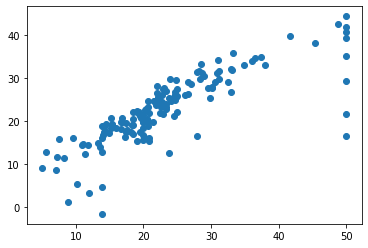

In [42]:
# Write the code to plot the correlation between "prices_test" and the prices  
# you predicted in Question 1.4.1.

plt.scatter(prices_test, prices_test_predicted)
plt.show()

### Question 1.4.3:

One common measure of the prediction error is the "root mean squared error" (RMSE) between the true values and the predicted values. The RMSE is calculated as follows:

\begin{equation}
\mathrm{RMSE} = \sqrt{\frac{1}{N}\sum_{i=0}^{N} \left( y_i^\mathrm{true} - y_i^\mathrm{predicted}\right)^2}
\end{equation}


*    In this question, calculate the RMSE for your test set, i.e. the RMSE between the true prices and the prices you predicted in Question 1.4.1.

In [41]:
# Calculate the RMSE 
error = prices_test - prices_test_predicted
rmse = np.sqrt(np.mean(error**2))

print("RMSE [x $1,000] = ", rmse)

RMSE [x $1,000] =  5.662741307904864


## Exercise 1.5: Linear Regression with Scikit-learn

As we saw in the lecture, the Python library Scikit-learn has capabilities for almost any type of macine learning you can think of.

It also does Linear Regression. Below is the a code example to use linear regression with sklearn.

```
# Import the machine
from sklearn.linear_model import LinearRegression

# Make a linear regression machine identically to our fitting in Numpy
machine = LinearRegression(fit_intercept=False)

# Fit the machine using the training features and training labels
machine.fit(x_train, y_train)
```

After the machine has been fitted, you can use the built-in `predict()` method to make predictions on new feature maps:

```
# Predict y-values using x_test features
y_test_predicted = machine.predict(x_test)
```



### Question 1.5.1:

*    In this question, use Scikit-learn to train a `LinearRegression` machine on the housing dataset. Use the same training and test data which you used in the previous example.

**Hint:** You use the above code snippets to solve this question.

In [40]:
# Implement the linear regression with Scikit-learn

from sklearn.linear_model import LinearRegression
 
machine = LinearRegression(fit_intercept=False)
 
machine.fit(features_train, prices_train)

prices_test_sklearn = machine.predict(features_test)

print(prices_test_sklearn)

[27.08891037 19.40768589 40.73604442 14.74809218 20.47140433 22.12963816
 17.05747905 34.9702988  24.73185704 15.56529702 12.39884119 39.47063809
 26.34010844 28.61534347 22.11361184  3.18403021 26.81028117 29.09876667
 18.02380111 21.17361141 31.58247512 26.04626572 17.78535658 19.79125809
 25.79350711 18.89456458 20.62019168 17.26913808 22.17780792 15.96777779
  5.25537392 31.83600946 42.52094819 18.79530044 16.28459705 14.39752525
 17.50229859  9.0630825  23.69766619 34.76964504 14.92175461 29.42299817
 12.68160434 11.4095486  25.7283809  29.78209888 27.53029616 16.43034755
 32.05528062 44.44065123 15.40174248  1.21258613 35.17710926 35.93682876
 30.56069276 21.6886704  39.78606429 29.72725493 26.13632751 20.21009359
 25.8010759  21.61063321 24.40576075 19.57518593 16.05095174 20.67048149
 16.76494214 24.63346547 20.76028385 24.28298716 24.66337165 25.75692176
 21.80124907 11.74836368 41.98719941 33.14918355 24.39680145  4.74327622
 23.36998542 24.57347741 18.3432605  14.36578646 18

### Question 1.5.2:

*    In this question, make a scatter plot between the between housing prices you predicted with Scikit-learn and the true prices.
*    Additionally, calculate the RMSE for prices you predicted with Scikit-learn.

**Hint:** If everything went well, you should have gotten the exact same plot and RMSE as you found in Questions 1.4.2 and 1.4.3.

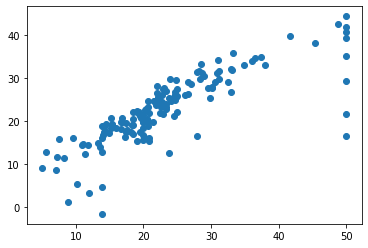

In [38]:
# Make a scatter plot for  the housing prices you predicted with 
# Scikit-learn and the true prices for the test set

plt.scatter(prices_test, prices_test_sklearn)
plt.show()

In [39]:
# Calculate the RMSE for the housing prices you predicted with 
# Scikit-learn and the true prices for the test set

# Calculate the RMSE 
error = prices_test - prices_test_sklearn
rmse = np.sqrt(np.mean(error**2))

print("RMSE [x $1,000] = ", rmse)

RMSE [x $1,000] =  5.662741307904864
